# Primer modelo de ML #

El objetivo es utilizar un Dataset para entrenar un modelo de ML supervisado que prediga el precio de las viviendas

### 1º Import libraries ###

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [2]:
# Definir una función para formatear los números flotantes
def format_float(value):
    return f"{value:.2f}"

# Configurar la opción de visualización para usar la función de formato
pd.options.display.float_format = format_float

### 2º Load Dataset ###

In [3]:
# Variables en donde se guarda el path del archivo
file_path = './kc_house_data.csv'

# Creamos el Dataframe
df = pd.read_csv(file_path)

# Revisamos que todo esté ok
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,20141015T000000,325000.00,2,0.75,1020,1076,2.00,0,0,...,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


#### Significado de las Variables ####

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent

condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


### 3º Exploración básica ###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Vemos que no hay nulos pero vamos a comprobarlo
df.isnull().sum(axis = 0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Variables Numéricas y Variables Categóricas ###

**Variables numéricas**


In [7]:
numericals = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
numericals


['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'zipcode']

**Variables Categóricas**
`date`
No tengo categóricas, son todas numéricas, excepto `date`pero si quisiera las siguientes las podría ver como categóricas si me hiciera falta. ['waterfront', 'yr_built', 'yr_renovated', 'zipcode']

In [8]:
categoricals = ['date']
categoricals

['date']

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Se explora la variable objetivo Price ###

In [10]:
df['price'].value_counts()

price
350000.00     172
450000.00     172
550000.00     159
500000.00     152
425000.00     150
             ... 
607010.00       1
1362500.00      1
298800.00       1
957500.00       1
402101.00       1
Name: count, Length: 4028, dtype: int64

C:\Users\sgome\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

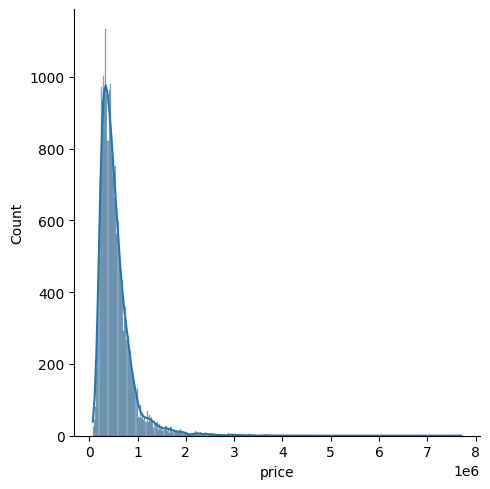

In [11]:
plt.figure(figsize =(10, 5))
sns.displot(data=df, x="price", kde=True)

Parece que hay una distribución normal aunque se extiende hacia la derecha, seguramente por outliers


<Axes: xlabel='price'>

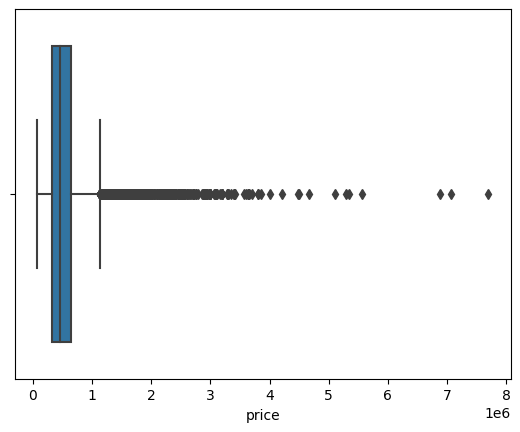

In [12]:
# Hay que eliminar los outliers
sns.boxplot(x=df["price"])

In [13]:
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [14]:
# Vamos a eliminar todos aquellos precios que sean > 1.500.000
df[df.price > 1500000]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,20140826T000000,2000000.00,3,2.75,3050,44867,1.00,0,4,...,9,2330,720,1968,0,98040,47.53,-122.23,4110,20336
153,7855801670,20150401T000000,2250000.00,4,3.25,5180,19850,2.00,0,3,...,12,3540,1640,2006,0,98006,47.56,-122.16,3160,9750
216,46100204,20150221T000000,1505000.00,5,3.00,3300,33474,1.00,0,3,...,9,1870,1430,1957,1991,98040,47.57,-122.21,3836,20953
246,2025069065,20140929T000000,2400000.00,4,2.50,3650,8354,1.00,1,4,...,9,1830,1820,2000,0,98074,47.63,-122.07,3120,18841
269,7960900060,20150504T000000,2900000.00,4,3.25,5050,20100,1.50,0,2,...,11,4750,300,1982,2008,98004,47.63,-122.22,3890,20060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,715010530,20150113T000000,1881580.00,5,3.50,4410,13000,2.00,0,3,...,10,2920,1490,2014,0,98006,47.54,-122.11,5790,12969
21568,524059330,20150130T000000,1700000.00,4,3.50,3830,8963,2.00,0,0,...,10,3120,710,2014,0,98004,47.60,-122.20,2190,10777
21576,9253900271,20150107T000000,3567000.00,5,4.50,4850,10584,2.00,1,4,...,10,3540,1310,2007,0,98008,47.59,-122.11,3470,18270
21597,191100405,20150421T000000,1575000.00,4,3.25,3410,10125,2.00,0,0,...,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125


In [15]:
# Eliminamos 516 filas
df.drop(df[df.price > 1500000].index , inplace =True)
# Restaura los índices
df.reset_index(inplace = True , drop =True)

C:\Users\sgome\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

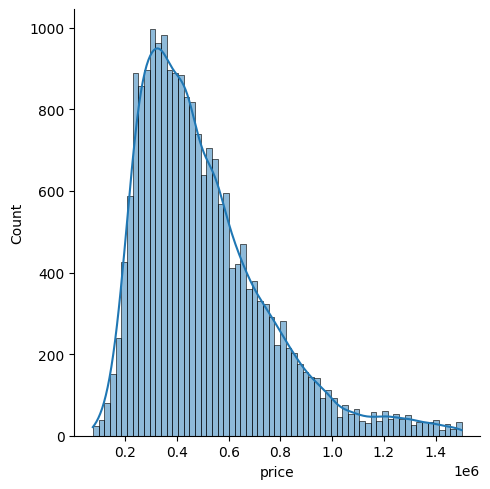

In [16]:
plt.figure(figsize =(10, 5))
sns.displot(data=df, x="price", kde=True)

### Manipulación de datos ###

In [17]:
# Se elimina la columna Id
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [18]:
# Pasamos fecha a un formato que se entienda
df["date"]= pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Tenemos la fecha en que se puso en venta la casa, también tenemos la fecha en que se construyó. Con estos datos vamos a crear una nueva variable yrs_house que nos dirá cuantos años tienen la casa. Un valor importante de cara al valor de venta.

In [19]:
# Año construida - Año puesta en venta = yrs_house
yrs_house = [df['date'][index].year - df['yr_built'][index] for index in range(df.shape[0])]

# Creamos la variable yrs_house en el dataset
df['yrs_house'] = yrs_house
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,59
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,63
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,82
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,49
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,28


Como esta vble es importante para predecir el valor de la casa, vamos a explorarla un poco más.

Podemos ver cuantos años tiene la casa más nueva, cuantos la casa más vieja y podemos sacar también una media

In [20]:
df['yrs_house'].describe()

count   21097.00
mean       43.41
std        29.28
min        -1.00
25%        18.00
50%        40.00
75%        63.00
max       115.00
Name: yrs_house, dtype: float64

La casa más nueva tiene -1 año. Tenemos que ver por qué es esto: un error al meter los datos?

La más vieja tiene 115 años

Y la media está en 43 años con una desviación estandar de 29 años.

In [21]:
df[df.yrs_house <0]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
1730,2014-06-25,597326.00,4,4.00,3570,8250,2.00,0,0,3,...,2860,710,2015,0,98040,47.58,-122.23,2230,10000,-1
2624,2014-10-29,385195.00,1,1.00,710,6000,1.50,0,0,3,...,710,0,2015,0,98144,47.58,-122.32,1440,4800,-1
7351,2014-12-31,614285.00,5,2.75,2730,6401,2.00,0,0,3,...,2730,0,2015,0,98072,47.77,-122.16,2520,6126,-1
7855,2014-06-24,455000.00,2,1.50,1200,1259,2.00,0,0,3,...,1000,200,2015,0,98144,47.60,-122.30,1320,1852,-1
14166,2014-08-26,500000.00,2,2.25,1570,1269,2.00,0,0,3,...,1280,290,2015,0,98199,47.65,-122.39,1570,6000,-1
16709,2014-06-17,350000.00,3,2.00,1380,3600,3.00,0,0,3,...,1380,0,2015,0,98122,47.61,-122.31,1480,3600,-1
19349,2014-08-01,455000.00,3,1.75,1320,1014,3.00,0,0,3,...,1320,0,2015,0,98122,47.60,-122.31,1380,1495,-1
20282,2014-08-28,357000.00,5,2.50,2990,9240,2.00,0,0,3,...,2990,0,2015,0,98133,47.74,-122.35,1970,18110,-1
20361,2014-07-09,595000.00,4,3.25,3730,4560,2.00,0,0,3,...,2760,970,2015,0,98103,47.67,-122.33,1800,4560,-1
20469,2014-07-31,230000.00,3,1.50,1040,1264,2.00,0,0,3,...,900,140,2015,0,98144,47.60,-122.30,1350,3000,-1


Hay sólo 12 de 21613 casas con -1 año. Podemos deducir que es un error por las pocas que son. Así que procedemos a eliminarlas del dataset

In [22]:
df.drop(df[df.yrs_house < 0].index , inplace =True)
# Restaura los índices
df.reset_index(inplace = True , drop =True)

In [23]:
# Comprobamos
df[df.yrs_house <0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house


Otra variable que puede ser importante en el precio de la casa es yr_renovated que nos dice cual fue el año de la última renovación.

In [24]:
df['yr_renovated'].describe()

count   21085.00
mean       79.13
std       389.44
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64

In [25]:
df['yr_renovated'].value_counts()

yr_renovated
0       20249
2014       88
2013       36
2005       33
2007       32
        ...  
1948        1
1959        1
1954        1
1934        1
1944        1
Name: count, Length: 70, dtype: int64

Vemos que existen 20687 registros en los que la vbla yr_renovated es 0
Es decir que sólo quedan 926 casas que han sido renovadas y el resto o no han sido renovadas desde que se construyeron
o no se ingresaron los datos de esa columna. Al ser tantos creo que es la primera opción: no han sido renovadas.
Esto puede ser importante para predecir el precio ya que aquellas que han sido renovadas deberían tener un plus en 
relación a aquellas que no lo han sido.

Vamos a ver la correlación entre el precio y el año de renovación para ver si nuestra hipótesis tiene sentido

In [26]:
df['price'].corr(df['yr_renovated'])

0.102335258837951

Vemos que es muy pequeña, por lo tanto no influye en el precio de venta. Deberíamos eliminar esa columna, pero antes, para estar seguros, vamos a crear un nuevo Dataset llamado df_temp que contenga sólo yr_renovated, price y una nueva caracteristica renovated: True si no es 0 yr_renovated y False si es 0. 

In [27]:

df_temp = df[['yr_renovated', 'price']]
df_temp.head()

,yr_renovated,price
0,0,221900.00
1,1991,538000.00
2,0,180000.00
3,0,604000.00
4,0,510000.00


In [28]:
# Creamos la columna renovated
df_temp.loc[:,'renovated'] = df_temp['yr_renovated'].apply(lambda x: True if x > 0 else False)


C:\Users\sgome\AppData\Local\Temp\ipykernel_9452\1296131494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:,'renovated'] = df_temp['yr_renovated'].apply(lambda x: True if x > 0 else False)


In [29]:
df_temp.head()

,yr_renovated,price,renovated
0,0,221900.00,False
1,1991,538000.00,True
2,0,180000.00,False
3,0,604000.00,False
4,0,510000.00,False


<Axes: xlabel='renovated', ylabel='price'>

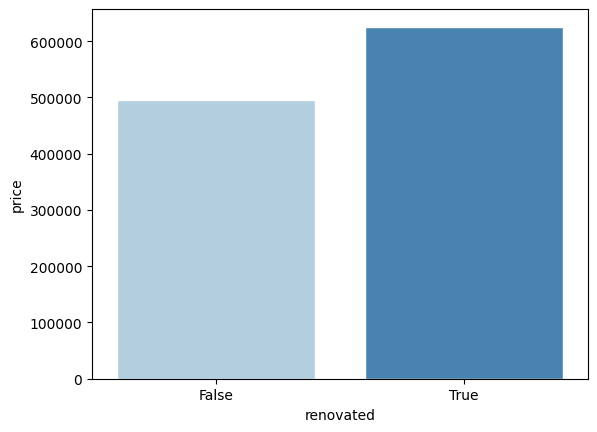

In [30]:
sns.barplot(x = 'renovated', y = 'price',  data = df_temp,
            palette = 'Blues', edgecolor = 'w', errorbar=None )

Eliminamos la columna porque corroboramos que no influye.



In [31]:
# Se elimina la columna yr_renovated
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,98178,47.51,-122.26,1340,5650,59
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,98125,47.72,-122.32,1690,7639,63
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,98028,47.74,-122.23,2720,8062,82
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,98136,47.52,-122.39,1360,5000,49
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,98074,47.62,-122.05,1800,7503,28


<Axes: >

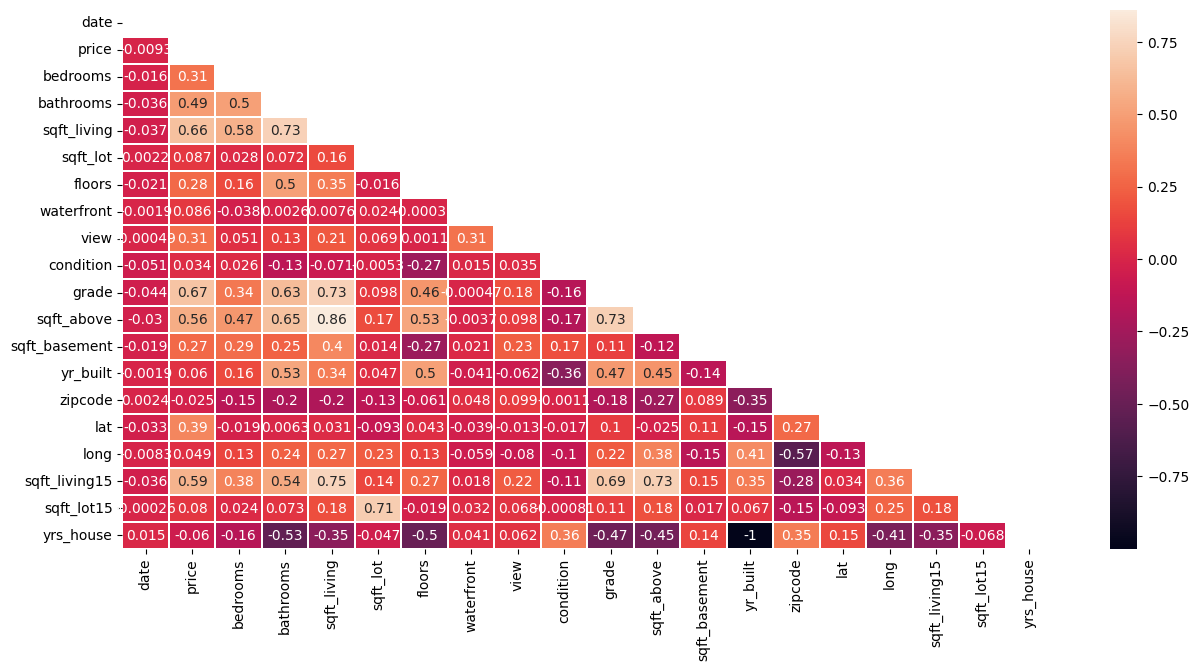

In [32]:
### corrolation plot
plt.figure(figsize =(15,7))
# Generamos una máscara para no duplicar los valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr() , mask = mask, annot =True , linewidth =0.2)

Correlaciones importantes:
con price:
- bathrooms
- **sqft_living**
- grade
- sqft_living15
- Bathrooms
- 

In [33]:
df.corr()['price'].sort_values(ascending=False)

price            1.00
grade            0.67
sqft_living      0.66
sqft_living15    0.59
sqft_above       0.56
bathrooms        0.49
lat              0.39
bedrooms         0.31
view             0.31
floors           0.28
sqft_basement    0.27
sqft_lot         0.09
waterfront       0.09
sqft_lot15       0.08
yr_built         0.06
long             0.05
condition        0.03
date            -0.01
zipcode         -0.03
yrs_house       -0.06
Name: price, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

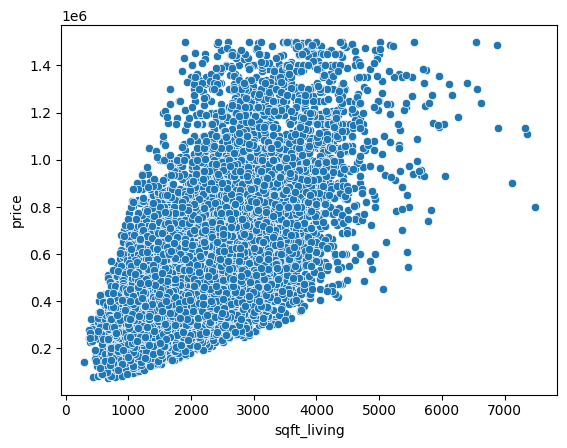

In [34]:
sns.scatterplot(y='price',x='sqft_living',data=df)

Se ve una correlación entre los metros cuadrados y el precio.



<Axes: xlabel='grade', ylabel='price'>

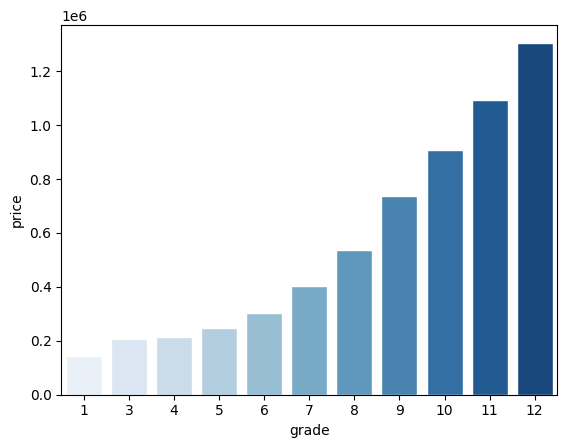

In [35]:
sns.barplot(x = 'grade', y = 'price',  data = df,
            palette = 'Blues', edgecolor = 'w', errorbar=None )

Como era de esperar a mayor calidad de construcción mayor el precio de venta. grade sería una variable importante para la predicción

In [36]:
# Eliminamos las columnas date ya sacamos el dato que queríamos de ella
df.drop('date', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,98178,47.51,-122.26,1340,5650,59
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,98125,47.72,-122.32,1690,7639,63
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,98028,47.74,-122.23,2720,8062,82
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,98136,47.52,-122.39,1360,5000,49
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,98074,47.62,-122.05,1800,7503,28


Preparo el set de datos para el modelo. 

In [37]:
y = df["price"]  # y Variable a predecir
X = df.drop(columns="price")  # X datos para entrenar y testear. Creamos un nuevo Dataset sin la categoría price
print(f"y tiene {y.shape[0]} filas")
print(f"X tiene {X.shape[0]} filas y {X.shape[1]} columnas")
df.shape
     

y tiene 21085 filas
X tiene 21085 filas y 18 columnas


(21085, 19)

## Preparación de datos ##
1º Divido el dataset en uno de entrenamiento y otro de pruebas

In [38]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el escalador y aplicar el escalado en los datos de entrenamiento
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Aplicar el mismo escalado en los datos de prueba
X_test = scaler.transform(X_test)
y_test.mean()


497637.00331989565

### Creamos funciones para que sea más sencillo probar distintos modelos y evaluarlos

In [39]:
# Esta función entrena el modelo
def pred(model, data_to_pred):
    y_pred = model.predict(data_to_pred)
    return y_pred

In [53]:
# Esta función evalúa las principales métricas de problemas de regresión
def test(y_pred, y_true):
    train_mae = mae(y_true, y_pred)
    train_mse = mse(y_true, y_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2(y_true, y_pred)
    
    # Cálculo de %
    train_size = len(y_true)
    mae_percentage = (train_mae / y_true.mean()) * 100
    mse_percentage = (train_mse / y_true.mean()) * 100
    rmse_percentage = (train_rmse / y_true.mean()) * 100
    
    # Imprimimos métricas
    print(f"MAE: {train_mae} porcentaje: {mae_percentage: .2f}%")
    print(f"MSE: {train_mse} porcentaje: {mse_percentage: .2f}%")
    print(f"RMSE: {train_rmse} porcentaje: {rmse_percentage:.2f}%")
    print(f"R2: {train_r2}")
    

In [54]:
# Esta función agrupa las dos anteriores para facilitar su uso
def pred_test(model, data_to_pred, y_true):
    y_pred = pred(model, data_to_pred)
    test(y_pred, y_true)

**Regresión lineal**

In [42]:
# Probamos con uno de los regresores más simples
model = LinearRegression()

model = model.fit(X_train, y_train)

In [43]:
# Con los datos de train
pred_test(model, X_train, y_train)

502213.2575883329
MAE: 97343.29672502808 porcentaje:  19.38%
MSE: 17759377918.236767 porcentaje:  3536222.44%
RMSE: 133264.31599733204 porcentaje: 26.54%
R2: 0.7164151967026965


In [44]:
# Con los datos de test
pred_test(model, X_test, y_test)

497637.00331989565
MAE: 95945.06879583289 porcentaje:  19.28%
MSE: 17765571725.883163 porcentaje:  3569986.08%
RMSE: 133287.55277925677 porcentaje: 26.78%
R2: 0.6920769516228116


Antes de eliminar los outliers de la variable `Precio`Los valores de MAE, MSE y RMSE eran bastantemás grandes. 
Ahora los datos han mejorado bastante


**KN**

In [45]:
# Probamos otro modelo sencillo
model = KNeighborsRegressor()

model = model.fit(X_train, y_train)

In [46]:
pred_test(model, X_train, y_train)

502213.2575883329
MAE: 58755.766694332466 porcentaje:  11.70%
MSE: 8110177204.098518 porcentaje:  1614887.12%
RMSE: 90056.52227406141 porcentaje: 17.93%
R2: 0.870495294501909


In [47]:
# Con los datos de test
pred_test(model, X_test, y_test)

497637.00331989565
MAE: 72194.65373488261 porcentaje:  14.51%
MSE: 12390816560.267792 porcentaje:  2489930.71%
RMSE: 111314.04475746892 porcentaje: 22.37%
R2: 0.78523528170155


**Random Forest Regressor**

In [57]:

# Generar datos de entrenamiento y prueba
#X, y = make_regression(n_samples=1000, n_features=4,
                       #n_informative=2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RandomForestRegressor
model = RandomForestRegressor(max_depth=12, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de training
pred_test(model, X_train, y_train)


MAE: 42823.69885594342 porcentaje:  8.53%
MSE: 3624823374.8387165 porcentaje:  721769.75%
RMSE: 60206.50608396668 porcentaje: 11.99%
R2: 0.9421181964552076


In [58]:
# Con los datos de test
pred_test(model, X_test, y_test)

MAE: 59732.45688076802 porcentaje:  12.00%
MSE: 8002170320.412978 porcentaje:  1608033.62%
RMSE: 89454.8507371902 porcentaje: 17.98%
R2: 0.8613018079736168


**Con un max_depth = 8** funciona mejor que con 2 y 4.

**train**

MAE: 63798.57919698583 porcentaje:  12.70%

MSE: 8311778623.539444 porcentaje:  1655029.71%

RMSE: 91168.95646841332 porcentaje: 18.15%

R2: 0.8672760883371534


**test:**

MAE: 68346.00560721452 porcentaje:  13.73%

MSE: 10050459003.878325 porcentaje:  2019636.59%

RMSE: 100251.97755594812 porcentaje: 20.15%

R2: 0.8257996971999882


**Con un max_depth = 10**


MAE: 52348.48198885779 porcentaje:  10.42%

MSE: 5495729646.409708 porcentaje:  1094301.98%

RMSE: 74133.18856227424 porcentaje: 14.76%

R2: 0.9122432430951393


**Test:**

MAE: 62747.30068496417 porcentaje:  12.61%

MSE: 8682533402.973967 porcentaje:  1744752.37%

RMSE: 93180.11270101559 porcentaje: 18.72%

R2: 0.8495093659617308


Se ve una diferencia mayor


**Probamos con un max_depth = 12**

**training**

MAE: 42823.69885594342 porcentaje:  8.53%

MSE: 3624823374.8387165 porcentaje:  721769.75%

RMSE: 60206.50608396668 porcentaje: 11.99%

R2: 0.9421181964552076


**Test:**

MAE: 59732.45688076802 porcentaje:  12.00%

MSE: 8002170320.412978 porcentaje:  1608033.62%

RMSE: 89454.8507371902 porcentaje: 17.98%

R2: 0.8613018079736168

**Se comporta peor, hay overfitting.**

### El que mejor funciona es con un max_depth = 8 ###



De los tres modelos, el que mejor se comporta es el **Random Forest Regressor**

### Antes de probar más modelos, vamos a tratar de mejorar el EDA y la ingeniería de características ###

In [50]:
# Para poder hacer cambios sin preocuparme, voy a guardar el dataset en otro para tenerlo de backup.
df_backup = df

In [51]:
df_backup.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_house
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,98178,47.51,-122.26,1340,5650,59
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,98125,47.72,-122.32,1690,7639,63
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,98028,47.74,-122.23,2720,8062,82
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,98136,47.52,-122.39,1360,5000,49
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,98074,47.62,-122.05,1800,7503,28


**Observaciones**:
Revisando el EDA, al volver sobre la variable `renovated` que había creado en un dataset temporal, me doy cuenta que el tipo de gráfico que utilicé no era el correcto. Al usar un gráfico de barras si se ve una relación entre el precio y si se renovó o no la casa. Como es de esperar si se renovó el precio sube en comparación con las que no se renovó.
Procedo a crear la variable `renovate` (true o false) en el dataset df (lo hago más arriba) y vuelvo a probar los modelos

In [52]:
#df = df[['yr_renovated', 'price']]
#df.head()


### Creamos la columna renovated
#df_temp.loc[:,'renovated'] = df_temp['yr_renovated'].apply(lambda x: True if x > 0 else False)
